# Descriptive Spatial Statistics

In this lab we will begin to understand some of the basics means to derive descriptive spatial statistics. First lets get some data loaded up so we can work with it. As always we will start with importing some essential libraries, then using the OS to navigate to our data folder and then importing the csv file.

In [1]:
import pandas as pd
import os

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
os.chdir('data')

In [4]:
os.listdir()

['Florida', 'food_all.csv', 'us_leader_lta.csv', 'wealthy_decrease.png']

The file we will be working with today is the 'food_all.csv'. This is data derived from a number of sources including REIGN, UCDP, World Bank, and others!

In [5]:
food_data = pd.read_csv('food_all.csv', encoding='latin-1')

Lets check and make sure that our data is loaded up properly.

In [6]:
food_data.head()

,ccode,country,leader,year,elected,age,male,militarycareer,tenure_months,government,anticipation,prev_conflict,pt_suc,pt_attempt,precip,couprisk,democracy,autocracy,day,date,stateabb,statenme,GEO,_ISO3N_,M49 Code_x,percap cals,stateab,Animal protein (kilocalories per person per day),Plant protein (kilocalories per person per day),Fat (kilocalories per person per day),Carbohydrates (kilocalories per person per day),Other (kilocalories per person per day),Sugar (kilocalories per person per day),Oils & Fats (kilocalories per person per day),Meat (kilocalories per person per day),Dairy & Eggs (kilocalories per person per day),Fruits & Vegetables (kilocalories per person per day),Starchy Roots (kilocalories per person per day),Pulses (kilocalories per person per day),Cereals & Grains (kilocalories per person per day),Alcoholic Beverages (kcal/person/day),Domestic food price volatility (index),fish and seafood (kg),Global Hunger Index,fruit (kilograms per person),Bananas,Dates,"Citrus, other",Oranges & Mandarines,Apples,Lemons & Limes,Grapes,Grapefruit,Pineapples,Plantains,"Fruits, other",Tea,Sugar,Peanuts,Palm oil,Coffee,Cocoa,Wheat,Rye,Rice,Corn,Barley,Pork,Beef,Lamb
0,2,USA,Truman,1950,1,66,1,0,69,Presidential Democracy,0,0,0,0,-0.022443,NaN,1,0,1,12/1/1950,United States of America,United States of America,Northern America,840,840.0,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.941159,59.484424,118.859179,86.580639,209.554560,64.589223,106.400588,88.389666,62.698668,134.582748,98.837209,52.338904,62.416235,33.789828
1,2,USA,Truman,1951,1,67,1,0,81,Presidential Democracy,0,0,0,0,0.360381,NaN,1,0,1,12/1/1951,United States of America,United States of America,Northern America,840,840.0,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.188009,62.773093,105.113114,126.972236,206.461401,66.207230,108.526250,95.058536,61.386704,148.932479,96.997691,44.231713,57.637668,36.525686
2,2,USA,Truman,1952,1,68,1,0,93,Presidential Democracy,0,0,0,0,-0.637583,NaN,1,0,1,12/1/1952,United States of America,United States of America,Northern America,840,840.0,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.439504,45.175804,107.801470,74.233219,200.969005,64.601713,101.795509,105.256906,65.018206,143.029880,103.201507,39.216767,59.957965,34.542642
3,2,USA,Eisenhower,1953,1,63,1,1,12,Presidential Democracy,0,0,0,0,-0.437170,NaN,1,0,1,12/1/1953,United States of America,United States of America,Northern America,840,840.0,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.727757,36.666250,108.958698,65.138732,216.097377,67.198249,88.888452,78.352454,72.129208,127.528297,87.476636,53.015523,66.883481,45.365448
4,2,USA,Eisenhower,1954,1,64,1,1,24,Presidential Democracy,0,0,0,0,-0.427828,NaN,1,0,1,12/1/1954,United States of America,United States of America,Northern America,840,840.0,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.713269,34.883999,119.177227,66.413681,287.468040,104.187841,91.950227,73.137950,64.878283,126.384525,81.101190,52.532690,64.182868,37.375006


Great! It all looks good so we can proceed to discuss some of the important things we talked about last class.

## Variable Types

First up variable types. As we talked about before people generally conceptualize variable types in four basic levels; nominal, ordinal, ratio and interval. Python has a number of accepted data types but we will focus for now on the ones that are related to the variable types discussed.

### Nominal

Nominal variable types are those that have not statistically important significance, but that does not however mean these are not important! Furthermore nominal data can come in a variety of python data types.  These can be both numbers, like IDs, or names.

**EXCERCISE** 
Find a nominal variable that is a:
1. Object (This is a string variable)
2. Int64 (This is a number or integer)


*Hint*
The python code to find a data type is '.dtypes'

Great! So why are nominal variable types so important? They can be used to group data. We will talk about crosstabulation later in the lab where these values will become increasingly important. 

### Ordinal

This data actually does not have an ordinal variable type already, but thats ok because its good practice to make a new variable! How about we take the leader age variable and bucket it! First lets check out what the distribution of the age variable is.

In [7]:
food_data.age.describe()

count    11088.000000
mean        56.851912
std         11.214074
min         17.000000
25%         49.000000
50%         57.000000
75%         64.000000
max         94.000000
Name: age, dtype: float64

Alright so we can now see the distributions of the variable.  Lets make four bins based on these percentiles, and lets just give it a simple label as well.

In [8]:
bins = [0, 49, 57, 64, 94]
labels = [1,2,3,4]

Now we can use the cut method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) to make this a new column in our data.

In [9]:
food_data['age_bin'] = pd.cut(food_data['age'], bins,labels=labels)

In [10]:
food_data.age_bin.describe()

count     11088
unique        4
top           2
freq       3101
Name: age_bin, dtype: int64

We now have an ordinal data type!

### Continous

Lets just put the next two together for this excercise as there are quite a few. 

**EXERCISE** 
Find the continuous value for the per person daily caloric food supply and record the:
1. Minimum
2. Maximum 


### BONUS! Binary/DUMMY Variables

Find one! Which value(0,1) represents what?

## Measures of Central Tendency

Lets start with the simplest and often the most important, average. Remeber average is only important for certain variable types. Lets pick one of the continuous variables and see what comes back.

In [11]:
food_data.Rye.mean()

43.53215513796764

How about a binary variable?

In [12]:
food_data.democracy.mean()

0.4724025974025974

Great lets try and get the median value of both of these now.

In [13]:
food_data.Rye.median()

39.25918781

In [14]:
food_data.democracy.median()

0.0

How about the mode?

In [15]:
food_data.Rye.mode()

0    51.521938
1    53.558470
2    54.278655
3    55.776368
dtype: float64

Hmm that is odd? Mode is supposed to return the most frequent value and yet this has returned four. Lets try to get mode a different way, namely using the value_counts() function. This returns a list of the number of times each value pops up.

In [16]:
food_data.Rye.value_counts()

53.558470     192
54.278655     192
55.776368     192
51.521938     192
47.693559     191
37.335788     191
56.050786     191
39.259188     191
26.756804     191
37.478194     191
27.453541     190
27.695588     190
29.984278     190
25.872386     190
37.961460     189
26.238207     189
30.917168     189
24.819808     189
22.137957     189
38.314703     189
24.531657     189
28.672068     189
29.600718     189
27.561698     187
26.244134     187
25.981091     182
35.398681     171
27.991370     171
22.088305     171
34.610070     171
             ... 
46.120794     165
49.574571     160
55.221680     157
71.218633     156
70.480044     156
82.670256     149
69.814926     147
37.309086     146
36.056547     146
41.413568     142
46.688233     139
44.750423     139
52.050390     136
53.057164     134
50.297251     130
54.455060     126
57.306680     124
50.847281     122
54.846190     115
48.380484     112
55.718467      94
57.304478      94
62.335010      93
69.341817      91
64.310513 

Aha! So all four of those values are the mode because each pops up in the data 4 times. 

## Sum, Min, Max

Lets go backwards. Min/Max can be really useful and also really easy to figure out. Just use the describe function we have used plenty so far.

In [17]:
food_data.Corn.describe()

count    10320.000000
mean        59.293087
std         31.407815
min         21.500003
25%         34.080372
50%         50.697077
75%         79.580925
max        148.932479
Name: Corn, dtype: float64

Now we can see that the price of corn has a low of 21.5 and a high of 148.9.  This can be particularly useful for looking into outliers in the data. Outliers are always important to account for.

Sum can be useful across an entire data frame in some circumstance, but for many of the variables not all that important.  What would be the use of summing the age of all leaders? Lets find a variable that could be useful however. Events are particularly useful to sum oftentimes. One event in this data is Coups! pt_attempt means in this given year a Powell and Thyne recorded coup was attempted. 

In [18]:
food_data.pt_attempt.sum()

408

That may seem like a lot of coups but in fact its only a very small percentage of the total country-years in the data frame. 

**Exercise** Find the number of country-years that had a coup

## Data Frame Types

So we've covered some basics of descriptives but now lets turn to the slightly more confusing aspect of manipulating dataframes in ways that are important to better illustrating trends we want to see. 

### Panel

We're gonng go backwards since you can always easily aggregate down, but not up. Lets try to identify the two key components that make a data frame the panel type. Remember in a panel data frame time and grouping units must both vary:
1. Grouping Variable
2. Time Variable

In [19]:
food_data.year.describe()

count    11088.000000
mean      1988.800144
std         19.001235
min       1950.000000
25%       1974.000000
50%       1990.000000
75%       2005.000000
max       2019.000000
Name: year, dtype: float64

In [20]:
food_data.country.unique()

array(['USA', 'Canada', 'Bahamas', 'Cuba', 'Haiti', 'Dominican Rep',
       'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Dominica',
       'Grenada', 'St Lucia', 'St Vincent', 'Antigua and Barbuda',
       'St Kitts and Nevis', 'Mexico', 'Belize', 'Guatemala', 'Honduras',
       'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Colombia',
       'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'Peru', 'Brazil',
       'Bolivia', 'Paraguay', 'Chile', 'Argentina', 'Uruguay', 'UKG',
       'Ireland', 'Netherlands', 'Belgium', 'Luxembourg', 'France',
       'Monaco', 'Liechtenstein', 'Switzerland', 'Spain', 'Andorra',
       'Portugal', 'Germany', 'Germany East', 'Poland', 'Austria',
       'Hungary', 'Czechoslovakia', 'Czech Rep', 'Slovakia', 'Italy',
       'San Marino', 'Malta', 'Albania', 'Montenegro', 'Macedonia',
       'Croatia', 'Yugoslavia', 'Serbia', 'Bosnia', 'Slovenia', 'Greece',
       'Cyprus', 'Bulgaria', 'Moldova', 'Romania', 'Soviet Union',
       'Russia', 'Estonia', 'L

Awesome so this is definitely a panel data frame! We have been performing descriptive statistics on this data frame before this point but now lets look at a few other ways to manipulate it through the groupby function. 

In [21]:
food_data.groupby('democracy')['Rye'].mean()

democracy
0    44.923467
1    41.886594
Name: Rye, dtype: float64

Here we see that the price of Rye is a little higher on average in autocracies. Lets see how many coups we have across these two groups.

In [22]:
food_data.groupby('democracy')['pt_attempt'].sum()

democracy
0    308
1    100
Name: pt_attempt, dtype: int64

Quite the disparity! A lot more coups have occured in autocracies historically. 

Lets see what the average age and percentage of leaders who have a military career all in one line. 

In [23]:
food_data.groupby('democracy')[['age', 'militarycareer']].mean()

,age,militarycareer
democracy,,
0,56.467692,0.309744
1,57.281023,0.051355


While the average age is only slightly higher in democracies, far less leaders have had a military career. 

### Longitudinal

We no are going to turn to a longitudinal data frame. This means that we are holding the grouping unit constant, and looking just at the change over time within that unit.

In [24]:
poland = food_data.loc[food_data.country == "Poland"]

In [25]:
poland.tail(10)
           

,ccode,country,leader,year,elected,age,male,militarycareer,tenure_months,government,anticipation,prev_conflict,pt_suc,pt_attempt,precip,couprisk,democracy,autocracy,day,date,stateabb,statenme,GEO,_ISO3N_,M49 Code_x,percap cals,stateab,Animal protein (kilocalories per person per day),Plant protein (kilocalories per person per day),Fat (kilocalories per person per day),Carbohydrates (kilocalories per person per day),Other (kilocalories per person per day),Sugar (kilocalories per person per day),Oils & Fats (kilocalories per person per day),Meat (kilocalories per person per day),Dairy & Eggs (kilocalories per person per day),Fruits & Vegetables (kilocalories per person per day),Starchy Roots (kilocalories per person per day),Pulses (kilocalories per person per day),Cereals & Grains (kilocalories per person per day),Alcoholic Beverages (kcal/person/day),Domestic food price volatility (index),fish and seafood (kg),Global Hunger Index,fruit (kilograms per person),Bananas,Dates,"Citrus, other",Oranges & Mandarines,Apples,Lemons & Limes,Grapes,Grapefruit,Pineapples,Plantains,"Fruits, other",Tea,Sugar,Peanuts,Palm oil,Coffee,Cocoa,Wheat,Rye,Rice,Corn,Barley,Pork,Beef,Lamb,age_bin
3121,290,Poland,Komorowski,2010,0,58,1,0,5,Presidential Democracy,0,0,0,0,1.890606,0.000334,1,0,1,12/1/2010,Poland,Poland,Eastern Europe,616,616.0,3413.0,Poland,209.16,195.88,1054.62,1953.34,20.0,422.0,557.0,414.0,271.0,144.0,207.0,19.0,1183.0,176.0,3.8,10.52,NaN,52.43,2.29,0.03,0.58,5.87,16.51,2.21,3.91,2.04,0.81,0.00,18.19,33.720002,29.360618,31.381513,37.329736,78.025526,33.565804,22.931435,37.478194,26.250891,36.341756,60.547631,16.346292,167.366309,165.269901,3
3122,290,Poland,Komorowski,2011,0,59,1,0,17,Presidential Democracy,0,0,0,0,-0.322348,0.000318,1,0,1,12/1/2011,Poland,Poland,Eastern Europe,616,616.0,3443.0,Poland,211.72,197.52,1063.08,1970.68,19.0,422.0,557.0,424.0,273.0,156.0,211.0,19.0,1181.0,181.0,7.4,9.63,NaN,53.86,2.13,0.03,0.51,6.05,16.53,2.12,3.78,1.76,1.19,0.00,19.77,33.092175,34.758403,49.430540,45.209857,104.633987,30.950856,32.303050,56.050786,26.970989,56.191498,76.784074,18.957462,195.682011,199.901823,3
3123,290,Poland,Komorowski,2012,0,60,1,0,29,Presidential Democracy,0,0,0,0,0.479066,0.000369,1,0,1,12/1/2012,Poland,Poland,Eastern Europe,616,616.0,3443.0,Poland,210.32,195.84,1059.93,1976.91,17.0,430.0,571.0,411.0,270.0,152.0,204.0,19.0,1184.0,185.0,7.1,10.34,NaN,57.63,1.38,0.03,0.72,8.89,17.25,2.17,3.51,1.93,0.97,0.47,20.32,32.169401,28.216065,50.480016,39.331674,70.519447,24.339000,32.329419,54.278655,27.791165,60.997731,87.240944,17.266451,196.471582,179.915106,3
3124,290,Poland,Komorowski,2013,0,61,1,0,41,Presidential Democracy,0,0,0,0,-0.528850,0.000322,1,0,1,12/1/2013,Poland,Poland,Eastern Europe,616,616.0,3451.0,Poland,213.08,192.80,1076.13,1968.99,18.0,430.0,583.0,410.0,278.0,146.0,191.0,17.0,1194.0,184.0,6.7,10.62,NaN,60.17,1.99,0.04,0.70,9.09,17.31,2.16,3.87,1.98,0.97,0.36,21.70,31.300000,22.830000,31.508720,33.226766,51.984920,24.449543,30.635729,55.776368,24.481270,55.410171,72.322420,17.782412,190.347418,164.486798,3
3125,290,Poland,Komorowski,2014,0,62,1,0,53,Presidential Democracy,1,0,0,0,-0.364762,0.000370,1,0,1,12/1/2014,Poland,Poland,Eastern Europe,616,616.0,NaN,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.530000,21.790000,29.420000,31.610000,74.140000,30.470000,26.370000,53.558470,19.970000,36.750000,50.220000,20.960000,229.492089,184.540000,3
3126,290,Poland,Duda,2015,1,43,1,0,5,Presidential Democracy,0,0,0,0,-0.988576,0.001339,1,0,1,12/1/2015,Poland,Poland,Eastern Europe,616,616.0,NaN,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.174600,17.087190,28.121785,23.789557,58.715669,30.967121,22.009427,51.521938,17.670020,32.904916,68.492986,13.747636,203.667366,149.682263,1
3127,290,Poland,Duda,2016,1,44,1,0,17,Presidential Democracy,0,0,0,0,0.315130,0.000367,1

Yep thats Poland. As we can see each row corresponds to a different year within Poland from 1950-2019. Now when we take descriptive statistics similar to before, we are doing it just across data on Poland in particular. 

In [26]:
poland.democracy.value_counts()

0    39
1    31
Name: democracy, dtype: int64

In [27]:
poland['percap cals'].mean()

3405.9056603773583

### Cross-Sectional

Cross-sectional holds time constant across units.  We could go about this a number of ways, taking ranges or aggregating across the entire dataframe. Let's just pick a single year though.

In [28]:
cross_13 = food_data.loc[food_data['year'] == 2013]

Again we can run descriptives across the data frame and to explain trends and patterns across all countries.

In [29]:
cross_13.government.value_counts()

Parliamentary Democracy           72
Presidential Democracy            51
Personal Dictatorship             22
Dominant Party                    15
Monarchy                          13
Party-Personal                     6
Provisional - Civilian             4
Foreign/Occupied                   3
Party-Military                     2
Party-Personal-Military Hybrid     1
Military-Personal                  1
Military                           1
Warlordism                         1
Name: government, dtype: int64

In [30]:
cross_13.democracy.mean()

0.640625

In [31]:
cross_13['percap cals'].describe()

count     165.000000
mean     2846.284848
std       444.532789
min      1879.000000
25%      2510.000000
50%      2829.000000
75%      3193.000000
max      3768.000000
Name: percap cals, dtype: float64

## BONUS Graph Descriptives

Don't worry about this next box for now this is just some settings for visual purposes.

In [32]:
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

def tableau_colors():
    """
    Args:

    Returns:
        dictionary of {color (str) : RGB (tuple) for the dark tableau20 colors}
    """
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)
    names = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'turquoise']
    colors = [tableau20[i] for i in range(0, 20, 2)]

    return dict(zip(names,colors))

def set_rc_params():
    """
    Args:

    Returns:
        dictionary of settings for mpl.rcParams
    """
    params = {'axes.linewidth' : 1.5,
              'axes.unicode_minus' : False,
              'figure.dpi' : 120,
              'font.size' : 12,
              'legend.frameon' : True,
              'legend.handletextpad' : 0.4,
              'legend.handlelength' : 1,
              'legend.facecolor' : 'white',
              'legend.fancybox'  : True,
              'legend.fontsize' : 6,
              'mathtext.default' : 'regular',
              'savefig.bbox' : 'tight',
              'xtick.labelsize' : 8,
              'ytick.labelsize' : 8,
              'xtick.major.size' : 6,
              'ytick.major.size' : 6,
              'xtick.major.width' : 1,
              'ytick.major.width' : 1,
              'xtick.top' : True,
              'ytick.right' : True,
              'axes.edgecolor' : 'black',
              'savefig.facecolor'   : 'white',
              'axes.facecolor'   : 'whitesmoke',
              'font.family' : 'sans',
              'font.monospace' : 'computer modern roman',
              'text.usetex' : True,
              'axes.grid' : True,
              'grid.color' :   'gray',
              'grid.linestyle' :   '-',
              'grid.linewidth'  :   0.2,
              'grid.alpha'       :   0.3,
              'axes.axisbelow'      : 'line'
              }
    for p in params:
        mpl.rcParams[p] = params[p]
    return params

set_rc_params()
tab = tableau_colors()

Lets plot a continuous variable!

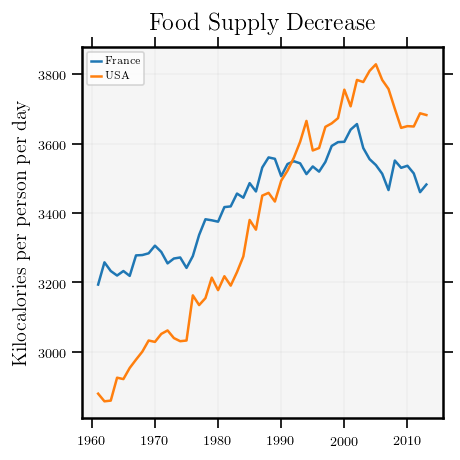

In [33]:
fig, ax = plt.subplots(1, figsize=[4,4])
france = food_data.loc[food_data['country'] == "France"]
usa = food_data.loc[food_data['country'] == "USA"]
plt.plot(france['year'], france['percap cals'], label='France')
plt.plot(usa['year'], usa['percap cals'], label='USA')
plt.title('Food Supply Decrease', y=1.02)
plt.ylabel('Kilocalories per person per day')
plt.legend()
fig.savefig('wealthy_decrease.png')
plt.tight_layout()
plt.show()

How about a nominal variable?

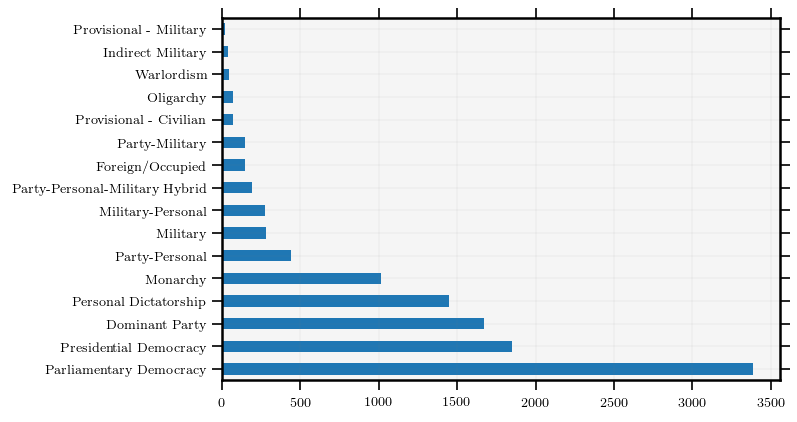

In [34]:
food_data.government.value_counts().plot(kind='barh')
plt.show()